# Crude_Selection

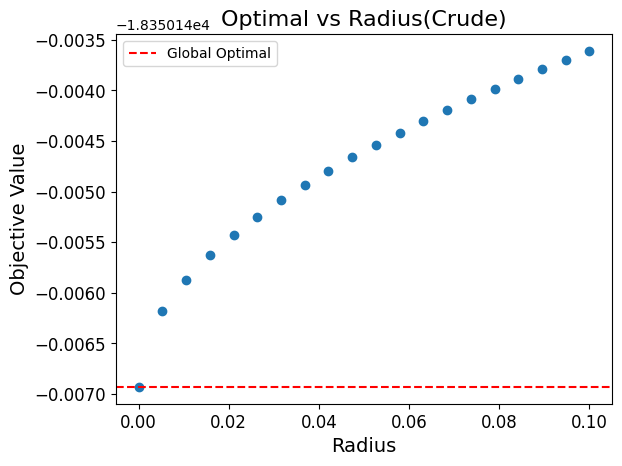

In [1]:
from NSPLIB.src.instances.crude_selection.crude_selection import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
import cProfile
import numpy as np
radius=np.linspace(0,0.1,20)
objs=[]
for r in radius:
    sto_m = const_model()
    m = CaoZavalaModel.from_sto_m(sto_m)
    m.build()
    binary_ys = [f'pickCrude[{i}]' for i in range(1, 10 + 1)]
    binary_y_val = {y: 0 for y in binary_ys}
    binary_y_val['pickCrude[2]'] = 1
    binary_y_val['pickCrude[3]'] = 1
    binary_y_val['pickCrude[4]'] = 1
    binary_y_val['pickCrude[8]'] = 1
    binary_y_val['pickCrude[10]'] = 1
    m.fix_binary_y(binary_y_val)
    updated_y_bound=m.y_bound
    updated_y_bound['crudeQuantity[1]']=(0,0)
    updated_y_bound['crudeQuantity[5]']=(0,0)
    updated_y_bound['crudeQuantity[6]']=(0,0)
    updated_y_bound['crudeQuantity[7]']=(0,0)
    updated_y_bound['crudeQuantity[9]']=(0,0)
    updated_y_bound['crudeQuantity[2]']=(150,151)
    updated_y_bound['crudeQuantity[3]']=(201,202)
    updated_y_bound['crudeQuantity[4]']=(56,57)
    updated_y_bound['crudeQuantity[8]']=(162,163)
    updated_y_bound['crudeQuantity[10]']=(18,19)
    m.update_y_bound(updated_y_bound)
    crude_obj = -18350.146929611754
    # m.update_y_bound({'crudeQuantity[1]': [0, 0], 'crudeQuantity[2]': [150.75121227052588, 151.000700564433], 'crudeQuantity[3]': [201.1709633227583, 201.29570747217807], 'crudeQuantity[4]': [56.05981734762004, 56.309305641527146], 'crudeQuantity[5]': [0, 0], 'crudeQuantity[6]': [0, 0], 'crudeQuantity[7]': [0, 0], 'crudeQuantity[8]': [162.12190591201795, 162.37139420592507], 'crudeQuantity[9]': [0, 0], 'crudeQuantity[10]': [18.72337265309496, 18.972860947002065]})
    # alg=CaoZavalaAlgo(m,solver="baron")
    # alg.solve(max_iter=1e5, max_time=3600*24, tol=1e-3,ubd_local_solve=1,ubd_midpt_fix=0,ubd_provided=-18350.146929613762)
    from pyomo.environ import Constraint
    def total_y_equals_100_rule(model):
        crude_sol = {}
        crude_sol['crudeQuantity[2]'] = 150.87595641747944
        crude_sol['crudeQuantity[3]'] = 201.29570746971186
        crude_sol['crudeQuantity[4]'] = 56.18456149457359
        crude_sol['crudeQuantity[8]'] = 162.2466500589715
        crude_sol['crudeQuantity[10]'] = 18.848116800048512
        return sum((model.y[i]-crude_sol[i])**2 for i in crude_sol) >= r

    m.origin_model.total_y_equals_100 = Constraint(rule=total_y_equals_100_rule)
    from pyomo.opt import SolverFactory
    solver = SolverFactory('baron')
    results=solver.solve(m.origin_model)
    objs.append(results["Problem"][0]["Upper bound"])
import matplotlib.pyplot as plt
plt.scatter(radius, objs)
plt.xlabel('Radius', fontsize=14)
plt.ylabel('Objective Value', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axhline(y=-18350.146929611754, color='red', linestyle='--', label='Global Optimal')
plt.legend()
plt.title('Optimal vs Radius(Crude)', fontsize=16)
plt.show()

# Pooling

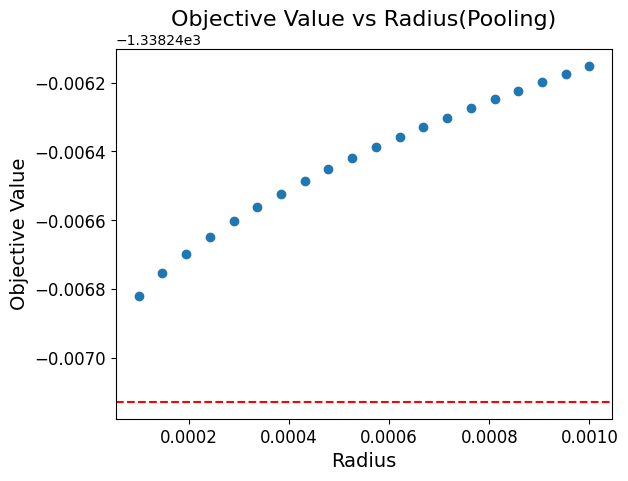

In [2]:
from NSPLIB.src.instances.pooling_contract_selection.pooling import const_model
from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from pyomo.environ import SolverFactory
from pyomo.environ import value
import numpy as np
radius=np.linspace(0.001,0.0001,20) #used for radius plot
objs=[]
cutoff=0. # trick to speed up baron
for r in radius:
    # create StochasticModel instance
    sto_m = const_model()

    # create CaoZavalaModel instance from sto_m
    m = CaoZavalaModel.from_sto_m(sto_m)
    # build the model
    m.build()

    # declare binary first-stage variables
    binary_ys = ['lambd[1]', 'lambd[2]', 'lambd[3]', 'lambd[4]', 'lambd[5]', 'theta[1]', 'theta[2]', 'theta[3]', 'theta[4]']

    binary_y_val = {y: 0 for y in binary_ys}
    binary_y_val['lambd[1]'] = 1
    binary_y_val['lambd[2]'] = 1
    binary_y_val['lambd[5]'] = 1
    binary_y_val['theta[1]'] = 1
    binary_y_val['theta[4]'] = 1
    m.fix_binary_y(binary_y_val)

    pooling_obj=-1338.2471283376406
    pooling_sol = {
        'A[1]': 300.0, 'A[2]': 201.92127476313524, 'A[3]': 0.0, 'A[4]': 0.0, 'A[5]': 245.18105081826008,
        'S[1]': 247.10232558139526, 'S[2]': 0.0, 'S[3]': 0.0, 'S[4]': 500.0
    }

    pooling_y_bound = {
        'A[1]': [0, 300], 'A[2]': [0, 250], 'A[3]': [0, 0], 'A[4]': [0, 0], 'A[5]': [0, 300],
        'S[1]': [0, 400], 'S[2]': [0, 0], 'S[3]': [0, 0], 'S[4]': [0, 500]
    }
    updated_y_bound=m.y_bound
    updated_y_bound['A[1]']=(299,300)
    updated_y_bound['A[2]']=(201.5,202.5)
    updated_y_bound['A[3]']=(0,0)
    updated_y_bound['A[4]']=(0,0)
    updated_y_bound['A[5]']=(244.5,246)
    updated_y_bound['S[1]']=(246.5,247.5)
    updated_y_bound['S[2]']=(0,0)
    updated_y_bound['S[3]']=(0,0)
    updated_y_bound['S[4]']=(499,500)
    m.update_y_bound(updated_y_bound)
    from pyomo.environ import Constraint
    def total_y_equals_100_rule(model):
        pooling_sol = {
            'A[1]': 300.0, 'A[2]': 201.92127476313524, 'A[3]': 0.0, 'A[4]': 0.0, 'A[5]': 245.18105081826008,
            'S[1]': 247.10232558139526, 'S[2]': 0.0, 'S[3]': 0.0, 'S[4]': 500.0
        }
        return sum((model.y[i]-pooling_sol[i])**2 for i in pooling_sol) >= r
    # alg = CaoZavalaAlgo(m, solver='baron')
    # alg.solve(max_iter=1e8, max_time=3600*24, tol=1e-3,ubd_midpt_fix=0,ubd_local_solve=0,ubd_provided=-1338.2471283376406)

    m.origin_model.total_y_equals_100 = Constraint(rule=total_y_equals_100_rule)

    solver = SolverFactory('baron')
    solver.options['MaxTime'] = 3600*24
    solver.options['EpsA'] = 1e-6
    solver.options["CutOff"]=cutoff
    results=solver.solve(m.origin_model)
    objs.append(results["Problem"][0]["Upper bound"])
    cutoff=results["Problem"][0]["Upper bound"]
import matplotlib.pyplot as plt

plt.scatter(radius, objs, marker='o')
plt.xlabel('Radius',fontsize=14)
plt.ylabel('Objective Value',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Objective Value vs Radius(Pooling)', fontsize=16)
plt.axhline(y=-1338.2471283376406, color='red', linestyle='--', label='Global Optimal')